In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import poisson
import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
np.set_printoptions(precision=4)


from ipywidgets import IntProgress
from IPython.display import display

## Preverba delovanja

Ne uporabljaj kompleksnih filenameov z večimi pikami, ker zmedejo Overleaf!

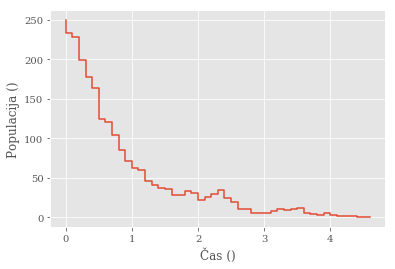

In [42]:
plt.figure()
dt = 0.1
beta = 1
MAXCAS = 1000
N0 = 250
cas = np.arange(0, MAXCAS, dt)
populacija = np.full_like(cas, np.NaN)
for i, _ in enumerate(cas):

    if i == 0:
        populacija[i] = N0
    else:
        N = populacija[i-1] # Populacija pred simuliranjem česarkoli
        populacija[i] = N + poisson(N * 4* beta * dt) - poisson(N*5*beta*dt)
        if populacija[i] <= 0:
            break

plt.step(cas[~np.isnan(populacija)], populacija[~np.isnan(populacija)])
plt.ylabel("Populacija ()")
plt.xlabel("Čas ()")
plt.savefig("1-0-tipanje-dt-0.1n0.250.pdf")
plt.show()

## Merjenje časov izumrtja

.loc išče po točnem indeksu, .iloc pa po vrstnem redu

IntProgress(value=0)

/home/peter/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


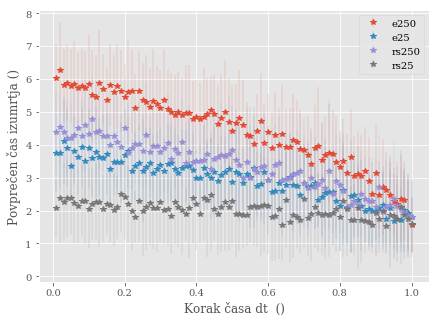

In [28]:
def seedaj():
    with open("/dev/urandom", 'rb') as f:
        return (int.from_bytes(f.read(3), 'big'))

def cas_izumrtja_rs(N0, dt):
    np.random.seed(seedaj())
    beta = 1
    N = N0
    i = 0
    izumrla = 0
    while not izumrla:
        i += 1
        N += poisson(4*beta*N*dt) - poisson(5*beta*N*dt)
        if N <1:
            izumrla = 1
    return i * dt
def cas_izumrtja_e(N0, dt):
    np.random.seed(seedaj())
    beta = 1
    N = N0
    i = 0
    izumrla = 0
    while not izumrla:
        i += 1
        N += - poisson(beta*N*dt)
        if N <1:
            izumrla = 1
    return i * dt
razpon_dtjev = np.linspace(0.01, 1, 100)
data = pd.DataFrame(columns=["e250","e25", "rs250", "rs25"], index=razpon_dtjev)
for col in data.columns:
    data[f"{str(col)}_err"] = np.nan    
    
    
max_count = len(razpon_dtjev)
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

PONOVITEV = 10*5
for N0 in [250, 25]:
    f.value=0
    for dt in razpon_dtjev:
        f.value +=1
        print(f"dt je {dt:0.2}", end="\r")
        izmerki = [cas_izumrtja_rs(N0, dt) for i in range(PONOVITEV)]
        povp = np.mean(izmerki)
        negotovost = np.std(izmerki)
        data[f"rs{int(N0)}"].loc[dt] = povp
        data[f"rs{int(N0)}_err"].loc[dt] = negotovost
        
        izmerki = [cas_izumrtja_e(N0, dt) for i in range(PONOVITEV)]
        povp = np.mean(izmerki)
        negotovost = np.std(izmerki)
        data[f"e{int(N0)}"].loc[dt] = povp
        data[f"e{int(N0)}_err"].loc[dt] = negotovost
data.to_csv("1-vpliv-dt.csv")

plt.figure(figsize=(7,5))

for col in ["e250","e25", "rs250", "rs25"
           ]:
    podatki = data[col]
    negotovost = data[f"{col}_err"]
    plt.errorbar(data.index, podatki, yerr = negotovost, label=col, elinewidth=0.2, linewidth=0, marker="*")
plt.xlabel("Korak časa dt  ()")
plt.ylabel("Povprečen čas izumrtja ()")
plt.legend()
plt.savefig("1-1-vpliv-dt2.pdf")
plt.show()

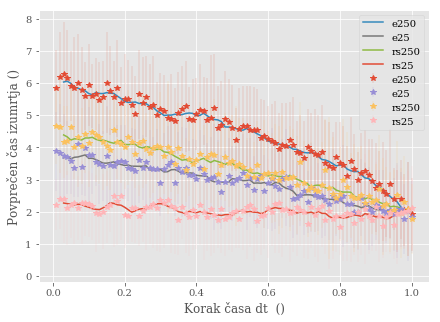

In [27]:
plt.figure(figsize=(7,5))

for col in ["e250","e25", "rs250", "rs25"
           ]:
    podatki = data[col]
    negotovost = data[f"{col}_err"]
    plt.errorbar(data.index, podatki, yerr = negotovost, label=col, elinewidth=0.2, linewidth=0, marker="*")
    plt.plot(data[col].rolling(6).mean().shift(-3), label=None)
plt.xlabel("Korak časa dt  ()")
plt.ylabel("Povprečen čas izumrtja ()")
plt.legend()
plt.show()

In [22]:
seedaj()

3553193606